Ejecutar el programa


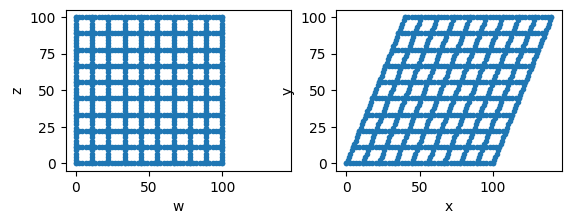

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def proyectarPts(T, wz, b = None):
    assert(T.shape == (2,2)) # chequeo de matriz 2x2
    assert(T.shape[1] == wz.shape[0]) # multiplicacion matricial valida   
    xy = None
    if b is not None:
        xy = T @ wz
        xy = xy + b
    else:
    ############### Insert code here!! ######################3    
        xy = T @ wz
    ############### Insert code here!! ######################3
    return xy

def pointsGrid(corners):
    # crear 10 lineas horizontales
    [w1, z1] = np.meshgrid(np.linspace(corners[0,0], corners[1,0], 46),
                        np.linspace(corners[0,1], corners[1,1], 10))

    [w2, z2] = np.meshgrid(np.linspace(corners[0,0], corners[1,0], 10),
                        np.linspace(corners[0,1], corners[1,1], 46))

    w = np.concatenate((w1.reshape(1,-1),w2.reshape(1,-1)),1)
    z = np.concatenate((z1.reshape(1,-1),z2.reshape(1,-1)),1)
    wz = np.concatenate((w,z))
                         
    return wz
          
def vistform(T, wz, b= None, titulo=''):
    # transformar los puntos de entrada usando T
    xy = proyectarPts(T, wz)
    if xy is None:
        print('No fue implementada correctamente la proyeccion de coordenadas')
        return
    # calcular los limites para ambos plots
    minlim = np.min(np.concatenate((wz, xy), 1), axis=1)
    maxlim = np.max(np.concatenate((wz, xy), 1), axis=1)

    bump = [np.max(((maxlim[0] - minlim[0]) * 0.05, 0.1)),
            np.max(((maxlim[1] - minlim[1]) * 0.05, 0.1))]
    limits = [[minlim[0]-bump[0], maxlim[0]+bump[0]],
               [minlim[1]-bump[1], maxlim[1]+bump[1]]]             

    fig, (ax1, ax2) = plt.subplots(1, 2)         
    fig.suptitle(titulo)
    grid_plot(ax1, wz, limits, 'w', 'z')    
    grid_plot(ax2, xy, limits, 'x', 'y')    
    
def grid_plot(ax, ab, limits, a_label, b_label):
    ax.plot(ab[0,:], ab[1,:], '.')
    ax.set(aspect='equal',
           xlim=limits[0], ylim=limits[1],
           xlabel=a_label, ylabel=b_label)


def main():
    print('Ejecutar el programa')
    # generar el tipo de transformacion dando valores a la matriz T
    T = pd.read_csv("T.csv", header=None).values

    corners = np.array([[0,0],[100,100]])
    wz = pointsGrid(corners)
    vistform(T, wz, 'Deformar coordenadas')
    plt.show()
    
    
main()


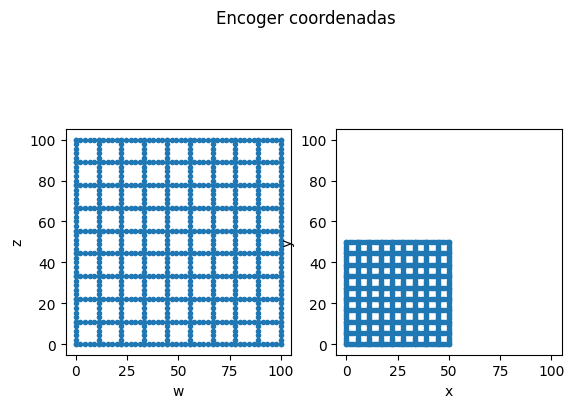

In [11]:
T = np.array([[0.5, 0],
              [0, 0.5]])


corners = np.array([[0,0],[100,100]])
wz = pointsGrid(corners)
vistform(T, wz, 'Encoger coordenadas')
plt.show()

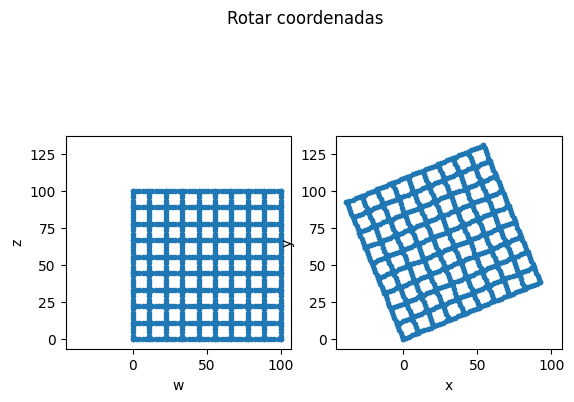

In [28]:
tita = np.pi/8
T = np.array([[np.cos(tita),-np.sin(tita)],[np.sin(tita),np.cos(tita)]])
corners = np.array([[0,0],[100,100]])
wz = pointsGrid(corners)
vistform(T, wz, 'Rotar coordenadas')
plt.show()


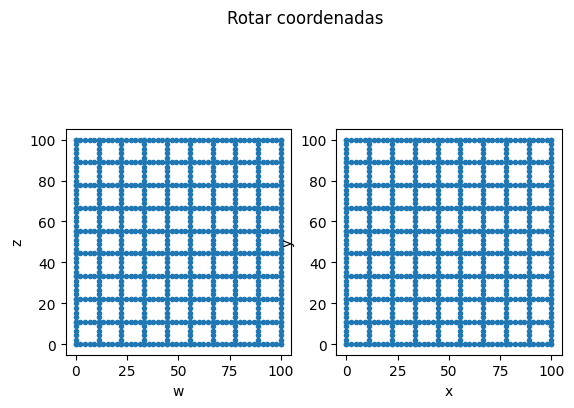

In [35]:
b = np.array([2,2,2])
T = np.identity(2)
corners = np.array([[0,0],[100,100]])
wz = pointsGrid(corners)
vistform(T, wz, b, 'Rotar coordenadas')
plt.show()
